In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [38]:
data = pd.read_excel(r'C:\Users\Windows 10\Documents\HIV 2010-2020.xlsx')
x = data['Time Period']
y = data['Total']

In [39]:
print(data)

   Time Period  Female  Male  Total
0           10      90   870    960
1           11      90   890    980
2           12     100  1000   1100
3           13     100  1200   1300
4           14     200  1400   1600
5           15     200  1600   1800
6           16     200  1800   2000
7           17     200  2000   2200
8           18     300  2200   2500
9           19     200  2500   2700


In [40]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

In [41]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [42]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = -1282.6666666666665 + 206.667β
Correlation Coef.:  0.991541703564481
"Goodness of Fit":  0.9831549499075531


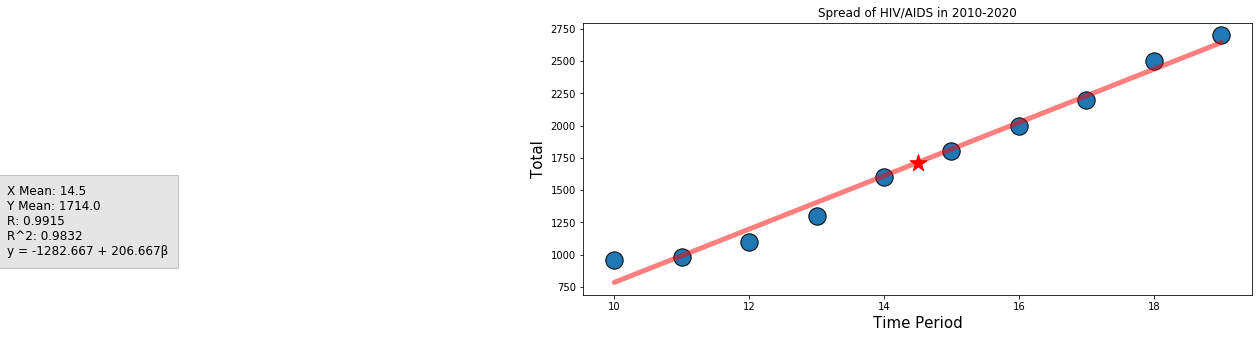

In [43]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} 
Y Mean: {}
R: {}
R^2: {}
y = {} + {}β'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=1000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('Spread of HIV/AIDS in 2010-2020')
plt.xlabel('Time Period', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point

In [44]:
def predict(B0, B1, new_x):
    y = B0 + B1 * new_x
    return y

ValueError: Expected 2D array, got 1D array instead:
array=['10' '11' '12' '13' '14' '15' '16' '17' '18' '19'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.